In [5]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

sns.set_theme()

In [6]:
## Importar dataset

data_path = '../data/' if os.path.exists(
    '../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

alta_tensao_path = data_path + 'treated/prepared/numeric/dataset-numeric-high-tension.csv'

alta_tensao_df = pd.read_csv(alta_tensao_path)

In [7]:
alta_tensao_df.describe()

,ano,mes,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2,num_industrias_extrativas,num_industrias_transformadoras
count,5187.000000,5187.000000,5.187000e+03,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,2022.842105,6.894737,6.888616e+06,0.040486,95.497205,0.365529,314.542125,3.549451,243.047619
std,0.586137,3.712284,1.426511e+07,0.211279,121.267530,4.073821,856.159555,7.986467,381.962040
min,2022.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,4.000000,0.000000,8.000000
25%,2022.000000,3.000000,4.113695e+05,0.000000,28.000000,0.000000,25.000000,0.000000,43.000000
50%,2023.000000,8.000000,1.824003e+06,0.000000,51.000000,0.000000,66.000000,1.000000,91.000000
75%,2023.000000,10.000000,5.962718e+06,0.000000,119.000000,0.000000,177.000000,4.000000,246.000000
max,2024.000000,12.000000,1.279470e+08,2.000000,1229.000000,75.000000,7310.000000,87.000000,2531.000000


### Discretizar a variável energia ativa alta tensao kwh

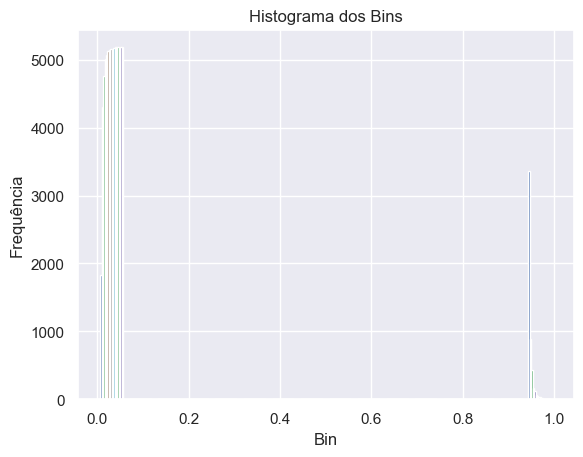

0.00 - 3349844.95
3349844.95 - 9260857.23
9260857.23 - 18073778.11
18073778.11 - 27864901.18
27864901.18 - 37334467.99
37334467.99 - 46622152.52
46622152.52 - 54159764.39
54159764.39 - 62774847.02
62774847.02 - 72884466.55
72884466.55 - 82179750.18
82179750.18 - 89817122.49
89817122.49 - 95192122.95
95192122.95 - 103745511.62
103745511.62 - 113247611.62
113247611.62 - 120238296.75
120238296.75 - 127947012.00
Valores unicos energia_ativa_alta_tensao_kwh: ['3349844.95 - 9260857.23', '0.00 - 3349844.95', '9260857.23 - 18073778.11', '18073778.11 - 27864901.18', '37334467.99 - 46622152.52', ..., '113247611.62 - 120238296.75', '103745511.62 - 113247611.62', '95192122.95 - 103745511.62', '82179750.18 - 89817122.49', '89817122.49 - 95192122.95']
Length: 16
Categories (16, object): ['0.00 - 3349844.95' < '3349844.95 - 9260857.23' < '9260857.23 - 18073778.11' < '18073778.11 - 27864901.18' ... '95192122.95 - 103745511.62' < '103745511.62 - 113247611.62' < '113247611.62 - 120238296.75' < '12023829

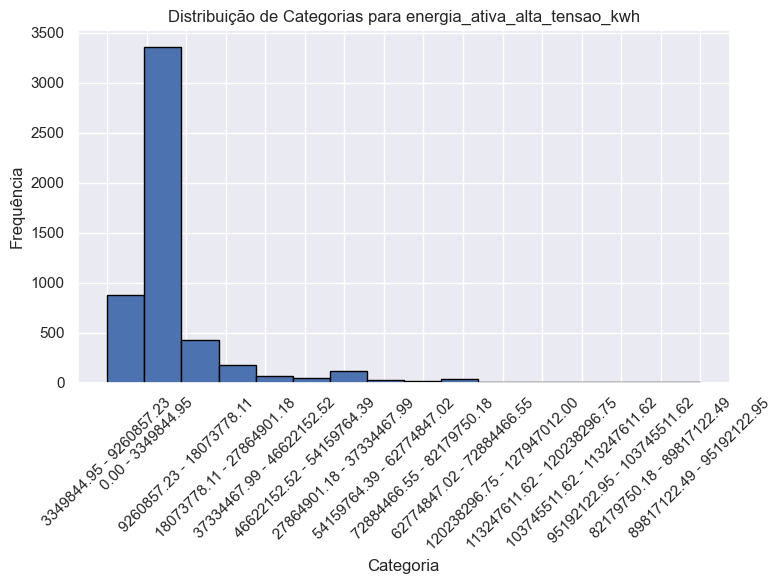

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5187 entries, 0 to 5186
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ano                                 5187 non-null   int64   
 1   mes                                 5187 non-null   int64   
 2   energia_ativa_alta_tensao_kwh       5187 non-null   category
 3   cpes_domestico_alta_tensao          5187 non-null   int64   
 4   cpes_nao_domestico_alta_tensao      5187 non-null   int64   
 5   cpes_outros_alta_tensao             5187 non-null   int64   
 6   densidade_populacional_pessoas_km2  5187 non-null   int64   
 7   num_industrias_extrativas           5187 non-null   int64   
 8   num_industrias_transformadoras      5187 non-null   int64   
dtypes: category(1), int64(8)
memory usage: 330.0 KB


In [8]:
# Parametros
coluna_energia_ativa_alta = "energia_ativa_alta_tensao_kwh"
energia_ativa_alta = alta_tensao_df[coluna_energia_ativa_alta]
num_bins = 16


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(energia_ativa_alta.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
alta_tensao_df[coluna_energia_ativa_alta] = pd.cut(energia_ativa_alta,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_energia_ativa_alta}: {alta_tensao_df[coluna_energia_ativa_alta].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(alta_tensao_df[coluna_energia_ativa_alta], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_energia_ativa_alta}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

alta_tensao_df.info()

In [9]:
# Filtrar o DataFrame para obter os valores de 2024
alta_tensao_2024_df = alta_tensao_df[(alta_tensao_df['ano'] == 2024)].copy()

alta_tensao_2024_df.info()
alta_tensao_2024_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 17 to 5186
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ano                                 546 non-null    int64   
 1   mes                                 546 non-null    int64   
 2   energia_ativa_alta_tensao_kwh       546 non-null    category
 3   cpes_domestico_alta_tensao          546 non-null    int64   
 4   cpes_nao_domestico_alta_tensao      546 non-null    int64   
 5   cpes_outros_alta_tensao             546 non-null    int64   
 6   densidade_populacional_pessoas_km2  546 non-null    int64   
 7   num_industrias_extrativas           546 non-null    int64   
 8   num_industrias_transformadoras      546 non-null    int64   
dtypes: category(1), int64(8)
memory usage: 39.6 KB


,ano,mes,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2,num_industrias_extrativas,num_industrias_transformadoras
count,546.0,546.000000,546.000000,546.000000,546.0,546.000000,546.000000,546.000000
mean,2024.0,1.500000,0.047619,96.485348,0.0,314.542125,3.549451,243.047619
std,0.0,0.500459,0.245181,122.640374,0.0,856.862054,7.993020,382.275449
min,2024.0,1.000000,0.000000,0.000000,0.0,4.000000,0.000000,8.000000
25%,2024.0,1.000000,0.000000,29.000000,0.0,25.000000,0.000000,43.000000
50%,2024.0,1.500000,0.000000,52.000000,0.0,66.000000,1.000000,91.000000
75%,2024.0,2.000000,0.000000,119.000000,0.0,177.000000,4.000000,246.000000
max,2024.0,2.000000,2.000000,1229.000000,0.0,7310.000000,87.000000,2531.000000


In [10]:
# Filtrar o DataFrame para obter os valores que não são de 2024
alta_tensao_outros_df = alta_tensao_df[(alta_tensao_df['ano'] != 2024)].copy()

alta_tensao_outros_df.info()
alta_tensao_outros_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4641 entries, 0 to 5184
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ano                                 4641 non-null   int64   
 1   mes                                 4641 non-null   int64   
 2   energia_ativa_alta_tensao_kwh       4641 non-null   category
 3   cpes_domestico_alta_tensao          4641 non-null   int64   
 4   cpes_nao_domestico_alta_tensao      4641 non-null   int64   
 5   cpes_outros_alta_tensao             4641 non-null   int64   
 6   densidade_populacional_pessoas_km2  4641 non-null   int64   
 7   num_industrias_extrativas           4641 non-null   int64   
 8   num_industrias_transformadoras      4641 non-null   int64   
dtypes: category(1), int64(8)
memory usage: 331.5 KB


,ano,mes,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao,densidade_populacional_pessoas_km2,num_industrias_extrativas,num_industrias_transformadoras
count,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,2022.705882,7.529412,0.039647,95.380952,0.408533,314.542125,3.549451,243.047619
std,0.455694,3.397902,0.206940,121.117813,4.304804,856.169267,7.986558,381.966373
min,2022.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,8.000000
25%,2022.000000,5.000000,0.000000,28.000000,0.000000,25.000000,0.000000,43.000000
50%,2023.000000,8.000000,0.000000,51.000000,0.000000,66.000000,1.000000,91.000000
75%,2023.000000,10.000000,0.000000,119.000000,0.000000,177.000000,4.000000,246.000000
max,2023.000000,12.000000,2.000000,1224.000000,75.000000,7310.000000,87.000000,2531.000000


# Guardar ficheiros

In [11]:
file_path = data_path + 'treated/prepared/categoric/no-dates/test/dataset-categoric-high-tension-test.csv'

alta_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/no-dates/test/dataset-categoric-high-tension-test.csv


In [12]:
file_path = data_path + 'treated/prepared/categoric/no-dates/train/dataset-categoric-high-tensions-train.csv'

alta_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/categoric/no-dates/train/dataset-categoric-high-tensions-train.csv
